In [1]:
import requests
import pandas as pd

In [2]:
twitter_info =[]

In [3]:
payload = {
    'api_key':'2081a20194d93e201741a74c980707b0',
    'query':'bullrun',
    'num':'50'
}

response = requests.get(
    'https://api.scraperapi.com/structured/twitter/search', params=payload)
nf = response.json()

In [4]:
nf.keys()

dict_keys(['search_information', 'organic_results', 'pagination'])

In [5]:
nf['organic_results'][4]['snippet']

'BULLRUN has a revolutionary Staking Platform that rewards stakers with #USDC and not with native tokens. A win for both the ecosystem and\xa0...'

In [6]:
all_tweets = nf['organic_results']
for tweets in all_tweets:
    twitter_info.append(tweets)

In [7]:
df = pd.DataFrame(twitter_info)

In [61]:
df.head()

,position,title,snippet,highlighs,link,displayed_link
0,0,BULLRUN.LIFE. (@BullRunLife) / ...,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[BULLRUN],https://twitter.com/BullRunLife,https://twitter.com › BullRunLife
1,1,𝔅𝔲𝔩𝔩𝔯𝔲𝔫 𝔊𝔯𝔞𝔳𝔞𝔫𝔬 (@Bullrun_Gravano) / ...,Bullrun Gravano's posts ... $SAVM launched. I'...,[Bullrun],https://twitter.com/Bullrun_Gravano,https://twitter.com › Bullrun_Gravano
2,2,Bullrun Studios (@bullrunstudios) / X,"At Bullrun Studios, we are dedicated to pushin...",[Bullrun],https://twitter.com/bullrunstudios,https://twitter.com › bullrunstudios
3,3,bullrun.life.,BULLRUN #SURVIVOR #KLWP BULLRUN GLOBAL DECENTR...,"[BULLRUN, BULLRUN, BULLRUN]",https://twitter.com/BullRunLife/status/1748072...,https://twitter.com › BullRunLife › status
4,4,bullrun.life.,BULLRUN has a revolutionary Staking Platform t...,[BULLRUN],https://twitter.com/BullRunLife/status/1747329...,https://twitter.com › BullRunLife › status


In [9]:
df.to_csv('snippettweets.csv',index_label='index')
print('file exported')

file exported


## DATA WRANGLING

In [60]:
df.head()

,position,title,snippet,highlighs,link,displayed_link
0,0,BULLRUN.LIFE. (@BullRunLife) / ...,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[BULLRUN],https://twitter.com/BullRunLife,https://twitter.com › BullRunLife
1,1,𝔅𝔲𝔩𝔩𝔯𝔲𝔫 𝔊𝔯𝔞𝔳𝔞𝔫𝔬 (@Bullrun_Gravano) / ...,Bullrun Gravano's posts ... $SAVM launched. I'...,[Bullrun],https://twitter.com/Bullrun_Gravano,https://twitter.com › Bullrun_Gravano
2,2,Bullrun Studios (@bullrunstudios) / X,"At Bullrun Studios, we are dedicated to pushin...",[Bullrun],https://twitter.com/bullrunstudios,https://twitter.com › bullrunstudios
3,3,bullrun.life.,BULLRUN #SURVIVOR #KLWP BULLRUN GLOBAL DECENTR...,"[BULLRUN, BULLRUN, BULLRUN]",https://twitter.com/BullRunLife/status/1748072...,https://twitter.com › BullRunLife › status
4,4,bullrun.life.,BULLRUN has a revolutionary Staking Platform t...,[BULLRUN],https://twitter.com/BullRunLife/status/1747329...,https://twitter.com › BullRunLife › status


In [24]:
#First we will be dropping columns that are not usual to our analysis, that is, Text Analysis
columns_to_drop = ['position','displayed_link']
df1 = df.drop(columns_to_drop, axis=1)

In [59]:
df1.head()

,title,snippet,highlighs,link
0,BULLRUN.LIFE. (@BullRunLife) / ...,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[BULLRUN],https://twitter.com/BullRunLife
1,𝔅𝔲𝔩𝔩𝔯𝔲𝔫 𝔊𝔯𝔞𝔳𝔞𝔫𝔬 (@Bullrun_Gravano) / ...,Bullrun Gravano's posts ... $SAVM launched. I'...,[Bullrun],https://twitter.com/Bullrun_Gravano
2,Bullrun Studios (@bullrunstudios) / X,"At Bullrun Studios, we are dedicated to pushin...",[Bullrun],https://twitter.com/bullrunstudios
3,bullrun.life.,BULLRUN #SURVIVOR #KLWP BULLRUN GLOBAL DECENTR...,"[BULLRUN, BULLRUN, BULLRUN]",https://twitter.com/BullRunLife/status/1748072...
4,bullrun.life.,BULLRUN has a revolutionary Staking Platform t...,[BULLRUN],https://twitter.com/BullRunLife/status/1747329...


In [34]:
#Removing duplicated rows
df2 = df1.drop_duplicates(subset = 'snippet', keep = False)

In [58]:
df2.head()

,title,snippet,highlighs,link,Sentiment
0,BULLRUN.LIFE. (@BullRunLife) / ...,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[BULLRUN],https://twitter.com/BullRunLife,0.50
1,𝔅𝔲𝔩𝔩𝔯𝔲𝔫 𝔊𝔯𝔞𝔳𝔞𝔫𝔬 (@Bullrun_Gravano) / ...,Bullrun Gravano's posts ... $SAVM launched. I'...,[Bullrun],https://twitter.com/Bullrun_Gravano,0.00
2,Bullrun Studios (@bullrunstudios) / X,"At Bullrun Studios, we are dedicated to pushin...",[Bullrun],https://twitter.com/bullrunstudios,0.00
3,bullrun.life.,BULLRUN #SURVIVOR #KLWP BULLRUN GLOBAL DECENTR...,"[BULLRUN, BULLRUN, BULLRUN]",https://twitter.com/BullRunLife/status/1748072...,0.25
4,bullrun.life.,BULLRUN has a revolutionary Staking Platform t...,[BULLRUN],https://twitter.com/BullRunLife/status/1747329...,0.80


In [36]:
df.describe()

,position
count,50.00000
mean,24.50000
std,14.57738
min,0.00000
25%,12.25000
50%,24.50000
75%,36.75000
max,49.00000


In [37]:
df1.describe()

,title,snippet,highlighs,link
count,50,50,50,50
unique,39,50,12,50
top,bullrun.life.,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[bullrun],https://twitter.com/BullRunLife
freq,11,1,17,1


In [38]:
df2.describe()

,title,snippet,highlighs,link
count,50,50,50,50
unique,39,50,12,50
top,bullrun.life.,BULLRUN Aims to be the most LIQUIDITY TOKEN in...,[bullrun],https://twitter.com/BullRunLife
freq,11,1,17,1


## TEXT ANALYSIS

In [40]:
#Before commencing Text Analysis I had to import and install all the libraries and modules I will be using

import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from textblob import TextBlob
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
nlp = spacy.load('en_core_web_sm')

#other things installed before starting this project 
#!pip install wordcloud
#!pip install textblob
#!pip install spacy
#!python -m spacy download en_core_web_sm


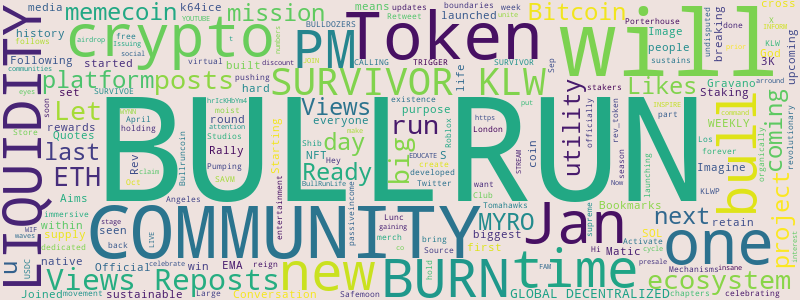

In [57]:
#To begin, I have to combine all titles into a single string and store it in a container called data
data = df2
snippet_text = ' '.join(data['snippet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800,height=300, background_color='#EEE2DE').generate(snippet_text)

# Plot the Word Cloud
fig = px.imshow(wordcloud, title='Crypto WordCloud')
fig.update_layout
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)

fig.show()

In [52]:
#Sentiment analysis
data['Sentiment'] = data['snippet'].apply(lambda x: TextBlob(x).sentiment.polarity)

#Sentiment distribution 
fig = px.histogram(data, x='Sentiment', title ='Sentiment Distribution Graph')
fig.update_layout
#fig.update_xaxes(showticklabels=False)
#fig.update_yaxes(showticklabels=False)
fig.show()